In [1]:
#!/usr/bin/env python

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from kinney2013_utils import make_gaussian_mix, draw_from_gaussian_mix
TINY_FLOAT64 = sp.finfo(sp.float64).tiny

execfile('test_header.py')

num_trials = 100

N = 10
G = 100
Z_eval = 'GLap'
num_Z_samples = 0
pt_method = 'GLap'
num_pt_samples = 10**4
fix_t_at_t_star = False

num_gaussians = 5

H_bias = np.zeros([num_trials, 2])
H_spread = np.zeros([num_trials, 2])
H_estimate = np.zeros(num_trials)

for i in range(num_trials):

    print ''
    print '#', i

    # Choose mixture of gaussians
    gaussians = make_gaussian_mix(num_gaussians)
    # Draw data from mixture
    [xis, xgrid, Q_true_func, details] = draw_from_gaussian_mix(N=N, Nx=G, gaussians=gaussians)
    # Compute data range and grid for fine-grained analysis
    xmin = min(xgrid)
    xmax = max(xgrid)
    xint = [xmin, xmax]
    xs = sp.linspace(xmin, xmax, G+1)
    dx = xs[1] - xs[0]
    xs = sp.linspace(xmin+0.5*dx, xmax-0.5*dx, G)
    Q_true = Q_true_func(xs)

    # Perform DEFT density estimation
    results = TestCase(feed_data=True,
                       data_fed=xis,
                       Q_true_func=Q_true_func,
                       N=N,
                       data_seed=None,
                       G=100,
                       alpha=3,
                       bbox=xint,
                       Z_eval=Z_eval,
                       num_Z_samples=num_Z_samples,
                       DT_MAX=1.0,
                       pt_method=pt_method,
                       num_pt_samples=num_pt_samples,
                       fix_t_at_t_star=fix_t_at_t_star
                       ).run()
    
    bc = results.results.bin_centers
    R = results.results.R
    h = results.results.h
    Q_star = results.results.Q_star
    Q_samples = results.results.Q_samples
    sample_weights = results.results.phi_weights
    
    #plt.bar(bc, R, width=h, color='grey', alpha=0.5)
    #plt.plot(xs, Q_true, color='black') # xs = bc
    #plt.plot(bc, Q_star, color='red')
    #plt.plot(bc, Q_samples, color='blue', alpha=0.2)
    #plt.ylim(0.0, 0.2)
    #plt.show()
    
    # Compute entropy of Q_true and Q_samples
    H_true = -sp.sum(Q_true * sp.log2(Q_true + TINY_FLOAT64)) * h
    H_samples = np.zeros(num_pt_samples)
    for k in range(num_pt_samples):
        Q_k = Q_samples[:,k]
        H_samples[k] = -sp.sum(Q_k * sp.log2(Q_k + TINY_FLOAT64)) * h
    # Naive bias & spread
    H_mean_naive = sp.mean(H_samples)
    H_std_naive = sp.std(H_samples)
    H_bias[i,0] = H_mean_naive - H_true
    H_spread[i,0] = H_std_naive
    # Weighted bias & spread
    H_mean_weighted = sp.sum(H_samples * sample_weights) / sp.sum(sample_weights)
    H_std_weighted = sp.sqrt(sp.sum(H_samples**2 * sample_weights) / sp.sum(sample_weights) - H_mean_weighted**2)
    H_bias[i,1] = H_mean_weighted - H_true
    H_spread[i,1] = H_std_weighted
    #
    H_estimate[i] = H_mean_weighted
    
# Plot 1: H bias (naive vs weighted)
x = np.array([range(2)]*num_trials)
plt.figure(1)
for j in range(2):
    plt.scatter(x[:,j], H_bias[:,j], color='black')
plt.xlabel('naive vs weighted')
plt.ylabel('H bias (bits)')
plt.savefig('H_bias')

# Plot 2: H spread (naive vs weighted)
counter = 0.
for i in range(num_trials):
    bias = H_bias[i,0]
    spread = H_spread[i,0]
    if abs(bias) < spread:
        counter += 1
success_rate_naive = counter / num_trials * 100

counter = 0.
for i in range(num_trials):
    bias = H_bias[i,1]
    spread = H_spread[i,1]
    if abs(bias) < spread:
        counter += 1
success_rate_weighted = counter / num_trials * 100        

title_str = 'Naive: %.1f%%   Weighted: %.1f%%' % (success_rate_naive, success_rate_weighted)

x = np.array([range(2)]*num_trials)
plt.figure(2)
for j in range(2):
    plt.scatter(x[:,j], H_spread[:,j], color='black')
plt.xlabel('naive vs weighted')
plt.ylabel('H spread (bits)')
plt.title(title_str)
plt.savefig('H_spread')

print ''
print '--- done ---'
print ''    


# 0
t_start = -5.69
Q_end = M: geo_dist (0.06) <= resolution (0.10)
Q_end = R: log_E (-20.18) < log_E_max (-0.05) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 1
t_start = -8.82
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-18.63) < log_E_max (1.46) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -11.06
Outcome: good.
------
ERROR: geo_dists

# 2
t_start = -5.38
Q_end = M: geo_dist (0.07) <= resolution (0.10)
Q_end = R: log_E (-21.16) < log_E_max (0.14) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -11.59
Outcome: good.
------
ERROR: geo_dists

# 3
t_start = -5.14
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-20.90) < log_E_max (0.37) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -11.81
Outcome: good.
------
ERROR: geo_dists

# 4
t_start = -5.72
Q_end = M: geo_dist (0.07) <= resolution (0.10)
Q_end = R: log_E (-21.35) < log_E_max (-0.26) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERRO

Q_end = R: log_E (-19.82) < log_E_max (0.43) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -11.52
Outcome: good.
------
ERROR: geo_dists

# 41
t_start = -6.25
Q_end = M: geo_dist (0.07) <= resolution (0.10)
Q_end = R: log_E (-22.32) < log_E_max (-1.28) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 42
t_start = -8.23
Q_end = M: geo_dist (0.06) <= resolution (0.10)
Q_end = R: log_E (-20.88) < log_E_max (-0.00) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 43
t_start = -9.05
Q_end = M: geo_dist (0.10) <= resolution (0.10)
Q_end = R: log_E (-20.85) < log_E_max (-0.29) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 44
t_start = -9.50
Q_end = M: geo_dist (0.08) <= resolution (0.10)
Q_end = R: log_E (-20.96) < log_E_max (-0.12) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 45
t_start = -9.68
Q_end = M: geo_dist (0.10) <= re

Succeeded!  t_star = -11.44
Outcome: good.
------
ERROR: geo_dists

# 81
t_start = -5.78
Q_end = M: geo_dist (0.09) <= resolution (0.10)
Q_end = R: log_E (-21.13) < log_E_max (0.68) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -10.75
Outcome: good.
------
ERROR: geo_dists

# 82
t_start = -9.53
Q_end = M: geo_dist (0.06) <= resolution (0.10)
Q_end = R: log_E (-20.38) < log_E_max (0.40) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -11.79
Outcome: good.
------
ERROR: geo_dists

# 83
t_start = -5.75
Q_end = M: geo_dist (0.10) <= resolution (0.10)
Q_end = R: log_E (-21.19) < log_E_max (-0.26) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 84
t_start = -6.30
Q_end = M: geo_dist (0.07) <= resolution (0.10)
Q_end = R: log_E (-20.17) < log_E_max (-0.02) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -inf
Outcome: good.
------
ERROR: geo_dists

# 85
t_start = -6.28
Q_end = M: geo_dist (0.10) <= resolution (0.10)
Q_end = R: log_E (-21.75) < log_E_max (-1.07) - L

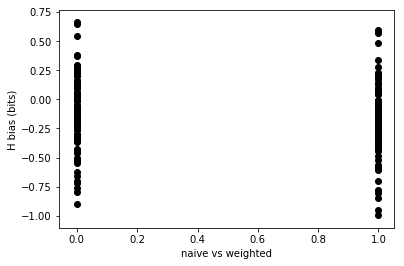

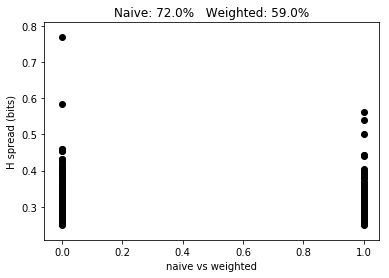

In [2]:
plt.show()

In [3]:
import pandas as pd

df_H_bias = pd.DataFrame(data=H_bias, columns=['Naive','Weighted'])
df_H_bias.index.name = '# trial'
df_H_bias.to_csv('H_bias.txt', sep='\t')

df_H_spread = pd.DataFrame(data=H_spread, columns=['Naive','Weighted'])
df_H_spread.index.name = '# trial'
df_H_spread.to_csv('H_spread.txt', sep='\t')

df_H_estimate = pd.DataFrame(data=H_estimate, columns=['H_estimate'])
df_H_estimate.index.name = '# trial'
df_H_estimate.to_csv('H_estimate.txt', sep='\t')

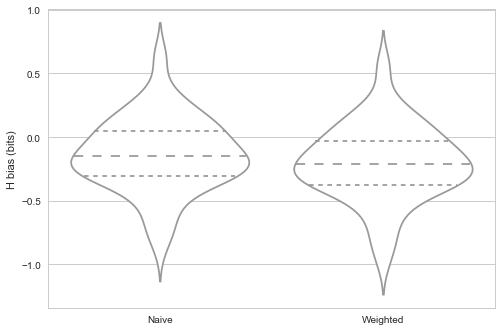

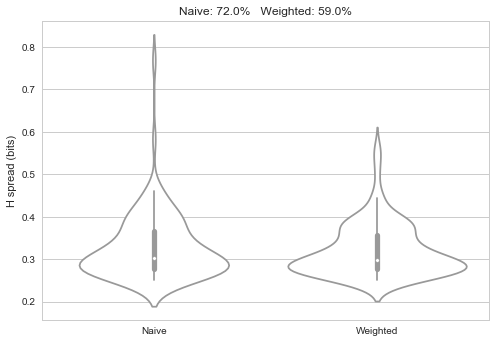

In [4]:
import seaborn as sns
%matplotlib inline
plt.ion()

sns.set(style='whitegrid')

plt.figure(3)
fig_H_bias = sns.violinplot(data=df_H_bias, color='white', inner='quart')
#fig_H_bias.set_ylim(-0.5, 0.5)
fig_H_bias.set_ylabel('H bias (bits)')
plt.savefig('H_bias_vp')

plt.figure(4)
fig_H_spread = sns.violinplot(data=df_H_spread, color='white')
#fig_H_spread.set_ylim(0.0, 0.5)
fig_H_spread.set_ylabel('H spread (bits)')
fig_H_spread.set_title(title_str)
plt.savefig('H_spread_vp')